In [1]:
%autosave 60
#auto save this ipynb file every 60 seconds as checkpoints
%matplotlib inline  

Autosaving every 60 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The empirical demand curve for a single session

### input WTP data for student and non-student

In [36]:
# from excel where we generate the max WTP over all time slots for each client
df = pd.read_clipboard(header=None) 
numpyMatrix = df.as_matrix()
wtp_student = numpyMatrix
wtp_student = wtp_student.T # was a column in excel
wtp_student = wtp_student[0] # array([[ 75,...,25]])
wtp_student

array([ 25,  25,  25,  25,  25,  25,  25,  25,  50,  50,  50,  50,  50,
        50,  50,  50,  50,  50,  75,  75,  75,  75,  75,  75,  75,  75,
        75,  75,  75,  75,  75, 100, 125])

In [20]:
# from excel where we generate the max WTP over all time slots for each client
df = pd.read_clipboard(header=None) 
numpyMatrix = df.as_matrix()
wtp_nonstudent = numpyMatrix
wtp_nonstudent = wtp_nonstudent.T # was a column in excel
wtp_nonstudent = wtp_nonstudent[0] # array([[ 75,...,25]])
wtp_nonstudent

array([ 75,  50,  75,  75, 100, 100,  50, 150,  25, 125, 125,  25,  50,
        75, 100,  50, 125, 100,  25,  75, 100,  50,  75,  50,  75,  50,
       100,  75, 100,  75,  50,  25,  50, 125, 100,  25,  75, 100,  75,
       100, 100,  50,  75,  75,  50,  75,  75,  50,  25, 100, 125,  50,
       125,  75, 125,  75,  25,  75,  75,  75, 100,  25, 100, 100, 100,
       100,  75, 100, 100,  75, 125,  75,  75,  50,  75,  75,  75, 100,
        50, 100])

### Plot demand curves

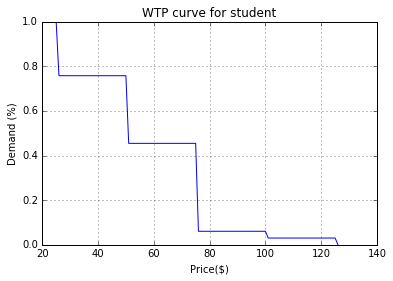

In [96]:
data = wtp_student

# Choose how many bins (defiend by num_bins or bin-edgs sequence inluding the rightmost)
seq_bins = np.arange(min(data)-1,max(data)+2,1) # +1 for range doesn't include right threshold & +1 for rightmost value set as max+1 (https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram.html)
    # gap is defined as integer gap, and here one integer occurance is regarded as one bin --- bin_edges is [,) 

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data, bins=seq_bins, normed=True)
    # norm: If False, the result will contain the number of samples in each bin. 
        # If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1
    # print(counts) #  [0.  0.24242424  0. ... 0.03030303.]   len=102
    # print(bin_edges) # [24. 25. 26. ... 126.]    len=103
# print("original bin_counts\n",counts)

# Now find the reserved_cdf = 1-p(X<x)
    # for each price p, the fraction of people who would buy at price p or higher rather than lower  
def array_reserve(x):
    temp=[]
    for index in range(len(x)-1,0-1,-1):
        temp.append(x[index])
    return np.array(temp)
reserved_counts = array_reserve(counts) 
sum_from_right = np.cumsum(reserved_counts) 
    # np.cumsum: Return the cumulative sum of the elements along a given axis. (https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
        # 1,2,3 -> 1,3,6
# print("sum_from_right\n",sum_from_right)


reserved_cdf = array_reserve(sum_from_right)
# print("reserved_cdf\n",reserved_cdf)


# hope the proportion to buy drops to 0 rather than 0.03
temp=list(reserved_cdf)
temp.append(0)
reserved_cdf_full = np.array(temp)
# print(reserved_cdf_full)
# print(len(reserved_cdf_full)) # 103

x_data = bin_edges
y_data = reserved_cdf_full 


# And finally plot the demand curve
        
# line plot
plt.plot(x_data,y_data)
plt.title('WTP curve for student')
plt.xlabel('Price($)')
plt.ylabel('Demand (%)')
plt.grid(True)
plt.show()


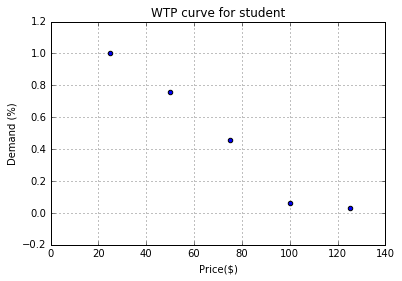

In [97]:
# hope to get rid of influence of missing values like 26,27,... due to pricing gap 
# - this is a special case for integer price 

# use dictionary to find unique values in the data 
# - if price is not always integer, we should compare data points and all bin_edges and see where to put that points
unique={}
for item in data:
    if item in unique:
        unique[item] += 1
    else: unique[item] = 1

# use dictionary to query
dict={}
for i in range(len(reserved_cdf_full)):
    dict[bin_edges[i]] = reserved_cdf_full[i]

x_data=[]
y_data=[]
for item in dict:
    if item in data:
        x_data.append(item)
        y_data.append(dict[item] )

        

# scatter plot
plt.scatter(x_data,y_data)
plt.title('WTP curve for student')
plt.xlabel('Price($)')
plt.ylabel('Demand (%)')
plt.grid(True)
plt.show()

{1: 6, 3: 4}


False

In [91]:
dict={}
dict[1]=2
dict[3]=4

for item in dict:
    print(item)

1
3
